# Deep Neural Network in Keras _1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/suniltt/fdp2021/blob/main/deep_neural_network/deep_net_in_keras_1.ipynb)

#### Load dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import SGD    #optimizer
import matplotlib as plt
import tensorflow as tf


#### Load data

In [4]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

#### Preprocess data

In [7]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [9]:
X_train /= 255
X_valid /= 255

In [11]:
n_classes = 10
# y_train = keras.utils.to_categorical(y_train, n_classes)
# y_valid = keras.utils.to_categorical(y_valid, n_classes)

# y_train =keras.utils.np_utils.to_categorical (y_train, n_classes)
# y_valid= keras.utils.np_utils.to_categorical(y_valid, n_classes)
from keras.utils import to_categorical

y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

 

In [ ]:
pip install np_utils

#### Design neural network architecture

In [13]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\ekkai\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

##### __[Click here to Explore Relu Activation function](relu.ipynb)__

#### Configure model

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

##### __[Click here to Explore Cross Entropy ](cross_entropy.ipynb)__

#### Train!

In [20]:
history=model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7658 - loss: 0.8061 - val_accuracy: 0.9252 - val_loss: 0.2540
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9289 - loss: 0.2444 - val_accuracy: 0.9455 - val_loss: 0.1880
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9474 - loss: 0.1801 - val_accuracy: 0.9543 - val_loss: 0.1510
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9567 - loss: 0.1486 - val_accuracy: 0.9603 - val_loss: 0.1318
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9632 - loss: 0.1235 - val_accuracy: 0.9644 - val_loss: 0.1176
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9686 - loss: 0.1026 - val_accuracy: 0.9636 - val_loss: 0.1180
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9728 - loss: 0.0914 - val_accuracy: 0.9688 - val_loss: 0.1028
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9762 - loss: 0.0841 - val_accuracy: 0.

In [24]:
test_case =X_valid[:1,:]

In [26]:
test_case.shape

(1, 784)

In [28]:
predicted_digit=model.predict(test_case)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


In [30]:
predicted_digit  # This is an array with probabilities for each digit

array([[3.9147259e-09, 2.3752857e-08, 1.5061709e-06, 7.3195015e-06,
        9.9790709e-10, 1.5588392e-07, 2.8526460e-14, 9.9999046e-01,
        1.0256177e-08, 5.3773664e-07]], dtype=float32)

In [32]:
import numpy as np
np.argmax(predicted_digit,axis=1)

array([7], dtype=int64)

In [34]:
model.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9722 - loss: 0.0892


[0.07888919115066528, 0.9761999845504761]

In [36]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


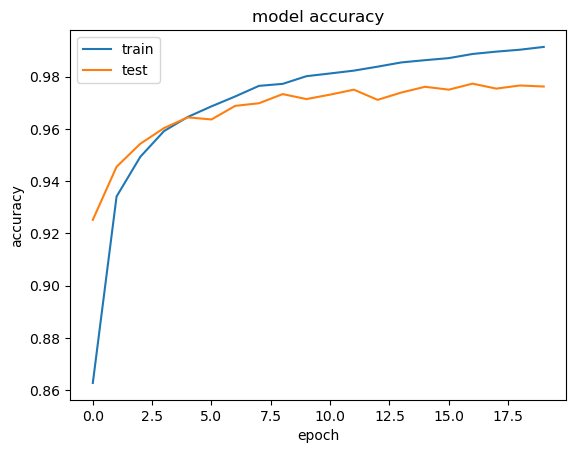

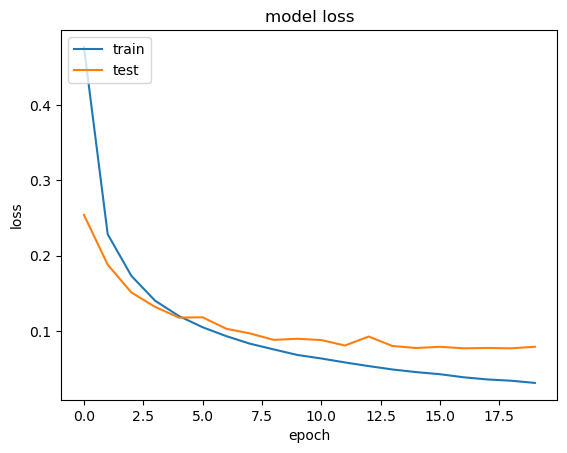

In [38]:
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.optimizers import SGD

# # Load data
# (X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# # Reshape and normalize input data
# X_train = X_train.reshape(60000, 784).astype('float32') / 255
# X_valid = X_valid.reshape(10000, 784).astype('float32') / 255

# # One-hot encode the labels
# n_classes = 10
# y_train = to_categorical(y_train, n_classes)
# y_valid = to_categorical(y_valid, n_classes)

# # Verify shape of the labels
# print(f"y_train shape: {y_train.shape}")
# print(f"y_valid shape: {y_valid.shape}")

# # Define the model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(784,)),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
